In [1]:
%reset -f
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, get_loss_plot, plot_loss
import numpy as np
import cv2

In [2]:
X_train, y_train, X_dev, y_dev, X_test, y_test = load_all_data("../setup/data")

In [3]:
h1 = 8
h2 = 4
lr = 0.0001

# 3.3.4

In [4]:
def initialize(X): 

    
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(h2, h1)
    
    dim3 = 1/np.sqrt(W2.shape[1])
    W3 = dim3 * np.random.randn(1, h2)

    b1 = np.zeros((h1, 1))
    b2 = np.zeros((h2, 1))
    b3 = np.zeros((1, 1))
    
    weights = (W1, W2, W3)
    biases = (b1, b2, b3)
    
    return weights, biases

In [5]:
def forward_pass(X, weights, biases):

    W1, W2, W3 = weights
    b1, b2, b3 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ z1 + b2
    a2 = sigmoid(z2)
    
    z3 = W3 @ z2 + b3
    a3 = sigmoid(z3)
    
    activations = (z1, a1, z2, a2, z3, a3)
    
    return activations

In [6]:
def backpropagation(X, y, weights, biases, activations):
    
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    z1, a1, z2, a2, z3, a3 = activations
    m = len(y)
        
    dz3 = a3 - y
    #print("dz3", dz3.shape)
    
    dW3 = np.dot(dz3, a2.T) /m
    #print("dW3", dW3.shape)
    
    db3 = np.sum(dz3, ).reshape(-1, 1) /m
    #print("db3", db3.shape)
    
    da2 = np.dot(W3.T, dz3)
    #print("da2", da2.shape)
    
    dz2 = da2 * sigmoid_derivative(z2)
    #print("dz2", dz2.shape)
    
    dW2 = np.dot(dz2, a1.T)/m
    #print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)/m
    #print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    #print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    #print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)/m
    #print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)/m
    #print("db1", db1.shape)
    
    return db1, dW1, db2, dW2, db3, dW3

In [7]:
def update_parameters(weights, biases, gradients, learning_rate):
    
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    
    db1, dW1, db2, dW2, db3, dW3 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
    W3 = gradient_update(W3, learning_rate, dW3)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    b3 = gradient_update(b3, learning_rate, db3)
    
    weights = (W1, W2, W3)
    biases = (b1, b2, b3)
    
    return weights, biases

# 3.3.5

In [8]:
X_train_flattened = vectorized_flatten(X_train)
X_dev_flattened = vectorized_flatten(X_dev)
X_test_flattened = vectorized_flatten(X_test)

y_train = y_train.reshape(1, -1)
y_dev = y_dev.reshape(1, -1)
y_test = y_test.reshape(1, -1)

weights, biases = initialize(X_train_flattened)
epochs = 2000

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}

for epoch in range(epochs):
    weights = history['weights'][epoch]
    biases = history['biases'][epoch]
    
    activations = forward_pass(X_train_flattened, weights, biases)
    gradients = backpropagation(X_train_flattened, y_train, weights, biases, activations)
    
    weights, biases = update_parameters(weights, biases, gradients, lr)
    
    y_prob = activations[-1]
    y_pred = np.where(y_prob > 0.5, 1, 0)
    
    loss = get_log_loss(y_train, y_prob)
    accuracy = get_accuracy(y_train, y_pred)
    
    history["weights"].append(weights)
    history["losses"].append(loss)
    history["biases"].append(biases)
    history["accuracies"].append(accuracy)

    if np.isnan(loss):
        break
    
    print(loss)

8349.727019550708
8338.842062723295
8327.82146602857
8316.610108578257
8305.136830594874
8293.269943883452
8280.818320656665
8267.541033677568
8253.154642838397
8237.336106483697
8219.721899154909
8199.90440781944
8177.426571144999
8151.775531743935
8122.375937359218
8088.583481862304
8049.679319038243
8004.866112680832
7953.266721474618
7893.926889868909
7825.823871672984
7747.883688200698
7659.010699688437
7558.1341825639465
7444.27718629931
7316.652115337643
7174.783666742895
7018.651186286874
6848.828697485742
6666.585143746896
6473.898684577276
6273.3487832038445
6067.883092873406
5860.50162354832
5653.934764524456
5450.3953201194
5251.456720830385
5058.065369221618
4870.655545126198
4689.315621355023
4513.956871624952
4344.451986210937
4180.728403616657
4022.815246411542
3870.8506994732193
3725.0603751807084
3585.718227555006
3453.100971213762
3327.445213481439
3208.9138992083745
3097.5755876093845
2993.3970828172196
2896.2475792255145
2805.911102822428
2722.103659325551
2644.491

1368.7752820133128
1368.3962520828954
1368.0180987748945
1367.6408184368918
1367.2644074436312
1366.8888621969204
1366.514179126133
1366.1403546867155
1365.7673853600077
1365.3952676538947
1365.023998101206
1364.6535732599853
1364.2839897128622
1363.915244067812
1363.5473329557308
1363.1802530323966
1362.8140009762637
1362.4485734899908
1362.0839672981663
1361.7201791486918
1361.3572058116902
1360.9950440791986
1360.6336907651798
1360.2731427050649
1359.9133967556886
1359.554449794767
1359.1962987206211
1358.8389404524455
1358.4823719291446
1358.1265901104189
1357.7715919749396
1357.4173745211601
1357.0639347672184
1356.7112697496295
1356.3593765243652
1356.008252165742
1355.6578937663521
1355.308298437147
1354.959463307427
1354.611385523537
1354.2640622500974
1353.9174906687135
1353.5716679779378
1353.2265913941205
1352.8822581497675
1352.5386654943404
1352.195810693298
1351.8536910288378
1351.5123037989733
1351.1716463176858
1350.831715915012
1350.4925099358688
1350.154025741473
1349

1254.9708026010526
1254.7955503586181
1254.620535498334
1254.4457576094765
1254.2712162843159
1254.0969111170807
1253.9228417039994
1253.7490076449806
1253.5754085411584
1253.4020439965357
1253.2289136172312
1253.0560170119115
1252.883353791603
1252.7109235690823
1252.5387259601744
1252.3667605827386
1252.1950270565537
1252.023525003388
1251.852254048421
1251.6812138182029
1251.5104039412586
1251.339824048181
1251.1694737728617
1250.9993527498664
1250.8294606171385
1250.6597970131006
1250.4903615803128
1250.3211539614213
1250.1521738025904
1249.9834207505996
1249.814894455731
1249.646594569435
1249.4785207444338
1249.3106726368303
1249.1430499036733
1248.9756522042949
1248.8084791994809
1248.6415305521791
1248.474805927504
1248.3083049917518
1248.1420274132163
1247.975972862314
1247.8101410103918
1247.6445315320505
1247.4791441018533
1247.3139783971521
1247.1490340966352
1246.9843108806153
1246.8198084313944
1246.6555264325957
1246.4914645694168
1246.3276225280972
1246.1639999981517
12

1196.7740109244737
1196.676123199881
1196.5783589120224
1196.4807178664296
1196.3831998700443
1196.2858047296488
1196.1885322521348
1196.0913822456782
1195.994354517884
1195.8974488774766
1195.8006651338726
1195.7040030964376
1195.6074625746082
1195.5110433792452
1195.4147453207834
1195.3185682102494
1195.2225118598913
1195.126576081187
1195.0307606864421
1194.9350654891682
1194.8394903024907
1194.7440349399217
1194.6486992159716
1194.5534829447206
1194.4583859417198
1194.3634080219329
1194.2685490014937
1194.1738086969199
1194.0791869245836
1193.9846835012384
1193.890298245269
1193.7960309739883
1193.7018815056172
1193.6078496594228
1193.5139352541294
1193.420138109699
1193.326458045804
1193.2328948830432
1193.1394484422765
1193.0461185443214
1192.952905011193
1192.8598076647463
1192.7668263271562
1192.6739608217813
1192.5812109712738
1192.4885765998754
1192.396057530912
1192.303653588945
1192.2113645996292
1192.1191903870954
1192.0271307771138
1191.935185595936
1191.8433546703495
119

1163.5660412139036
1163.5085593071467
1163.4511480832002
1163.3938074856735
1163.3365374564928
1163.2793379391728
1163.2222088757228
1163.1651502105901
1163.1081618865887
1163.0512438475223
1162.994396037464
1162.9376184010016
1162.8809108813202
1162.8242734245807
1162.7677059743457
1162.7112084764005
1162.6547808755893
1162.5984231177947
1162.5421351483947
1162.4859169129813
1162.4297683587001
1162.3736894307283
1162.3176800767255
1162.261740242249
1162.205869875001
1162.1500689215038
1162.0943373302975
1162.0386750480675
1161.9830820226666
1161.9275582018686
1161.8721035343576
1161.8167179677926
1161.7614014516098
1161.7061539338015
1161.6509753636487
1161.5958656900534
1161.5408248626818
1161.4858528311051
1161.4309495446132
1161.3761149533675
1161.3213490073897
1161.2666516572617
1161.2120228528875
1161.1574625448604
1161.1029706846728
1161.0485472228033
1160.9941921103753
1160.9399052986582
1160.8856867400405
1160.8315363850952
1160.7774541866356
1160.7234400960572
1160.6694940655

In [9]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.976
best loss: 1152.495415486211
best epoch: 1998


# 3.3.6

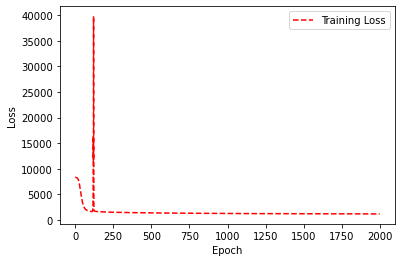

In [10]:
plot_loss("loss.png", history["losses"][:-2])

# 3.3.7

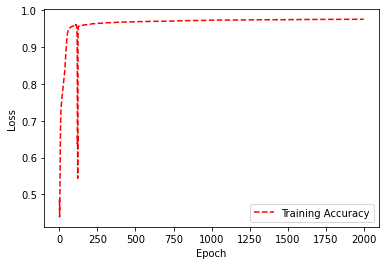

In [11]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.3.8

In [12]:
weights = history["weights"][best_epoch]
biases = history["biases"][best_epoch]
activations = forward_pass(X_dev_flattened, weights, biases)

y_dev_prob = activations[-1]
y_dev_pred = np.where(y_dev_prob > 0.5, 1, 0)

loss = get_log_loss(y_dev, y_dev_prob)
accuracy = get_accuracy(y_dev, y_dev_pred)
print(f"Dev set accuracy: {accuracy}")

Dev set accuracy: 0.974
